In [ ]:
python -m pip install opencv-contrib-python #внутрь конда окружения

In [1]:
import cv2

In [ ]:
image = cv2.imread('/home/aeternnar/Pictures/ML/RGB-image.png')
cv2.imshow('Image', image)

cv2.waitKey(0) #ожидает нажатия любой клавиши
cv2.destroyAllWindows() #закроет окно перед завершением скрипта

In [ ]:
image = cv2.imread('/home/aeternnar/Pictures/ML/RGB-image.png')
image2show = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #конвертация BGR -> RGB

plt.imshow(image2show)

In [ ]:
path = '/home/aeternnar/Pictures/ML/'
cv2.imwrite(path + 'new_img.jpg', image)

## **Обработка кадров видео**

In [ ]:
cap = cv2.VideoCapture(path + 'random_pixel_set2.mp4')

In [ ]:
while cap.isOpened():
    read_ok, frame = cap.read()

    if not read_ok:
        break

    cv2.imshow('Frame', frame)
    
    if cv2.waitKey(500) == 27:
        break
    
cap.release()
cv2.destroyAllWindows()

## **Создание изображений**

In [ ]:
image[:] = [255, 0, 0] #присваивает всем пикселям один и тот же цвет

In [ ]:
# Создаем горизонтальный градиент от черного к белому
for x in range(width):
    color = int((x / width) * 255)
    image[:, x] = [color, color, color]

In [ ]:
# Сохраняем изображение
cv2.imwrite("image.png", image)

## **Создание фигур**

In [ ]:
# Рисование линии
start_point = (50, 50)
end_point = (200, 200)
color = (255, 0, 0)  # Синий
thickness = 2  # Толщина линии

cv2.line(image, start_point, end_point, color, thickness)

In [ ]:
# Рисование прямоугольника
start_point = (50, 50)
end_point = (200, 200)
color = (0, 255, 255)  # Желтый
thickness = 2  # Толщина линии

#Для создания заполненного прямоугольника установить толщину равной -1
cv2.rectangle(image, start_point, end_point, color, thickness)

In [ ]:
# Рисование круга
center = (150, 150)
radius = 50
color = (255, 0, 0)  # Синий
thickness = 2  # Толщина линии

cv2.circle(image, center, radius, color, thickness)

In [ ]:
# Вывод текста
text = "Привет, друг!"
org = (50, 50)
font = cv2.FONT_HERSHEY_COMPLEX
font_scale = 1
color = (255, 255, 255)  # Белый
thickness = 2

cv2.putText(image, text, org, font, font_scale, color, thickness, cv2.LINE_AA)

## **Создание видео, GIF**

In [ ]:
width, height = 600, 600
num_frames = 300


filename = 'moving_circle.mp4'

# Создаем объект записи видео
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = 20
out = cv2.VideoWriter(filename, fourcc, fps, (width, height))


for i in range(num_frames):
    frame = np.zeros((height, width, 3), dtype=np.uint8)
    x_position = int(600 * (i / num_frames))
    y_position = 300 
    cv2.circle(frame, (x_position, y_position), 30, (0, 255, 0), -1)
    out.write(frame)
out.release()


cap = cv2.VideoCapture(filename)

while cap.isOpened():
    read_ok, frame = cap.read()
    if not read_ok:
        break
    cv2.imshow('Moving circle', frame)
    if cv2.waitKey(50) == 27:
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
from PIL import Image

filename = 'moving_circle.mp4'
# Чтение видео и создание GIF
cap = cv2.VideoCapture(filename)
frames = []

while cap.isOpened():
    read_ok, frame = cap.read()
    if not read_ok:
        break
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img = Image.fromarray(frame_rgb)
    frames.append(img)

cap.release()

# Сохранение в GIF
frames[0].save('moving_circle.gif', save_all=True, append_images=frames[1:], duration=50, loop=0)

### **Сохранение кадров видео в отдельные файлы**

In [ ]:
import os

# Создаем директорию для сохранения изображений, если ее нет
output_dir = 'images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Открываем видеофайл
video_path = 'video.mp4'
cap = cv2.VideoCapture(video_path)

frame_count = 0

while cap.isOpened():
    read_ok, frame = cap.read()
    if not read_ok:
        break
    
    # Формируем имя файла
    frame_filename = os.path.join(output_dir, f'frame_{frame_count:06d}.png')
    
    # Сохраняем кадр в файл
    cv2.imwrite(frame_filename, frame)
    
    frame_count += 1

cap.release()
print(f"Сохранено {frame_count} кадров в директорию {output_dir}")

### **Создание видео из набора изображений**

In [ ]:
# Параметры видео
frame_rate = 20
output_video_path = 'output_video.mp4'

# Директория с изображениями
input_dir = 'images'

# Получаем список файлов изображений
image_files = sorted([f for f in os.listdir(input_dir) if f.endswith('.png')])

# Проверяем, есть ли изображения
if not image_files:
    raise ValueError("Нет изображений в директории")

# Читаем первое изображение для получения размеров кадра
first_frame = cv2.imread(os.path.join(input_dir, image_files[0]))
height, width, layers = first_frame.shape

# Создаем объект записи видео
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, frame_rate, (width, height))

# Записываем каждое изображение в видеофайл
for image_file in image_files:
    frame = cv2.imread(os.path.join(input_dir, image_file))
    out.write(frame)

out.release()
print(f"Видео сохранено в {output_video_path}")

### **Интерактивная работа с мышью**

In [ ]:
import cv2

# Функция обработки событий мыши
def mouse_callback(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print(f"Left button down at ({x}, {y})")
    elif event == cv2.EVENT_LBUTTONUP:
        print(f"Left button up at ({x}, {y})")
    elif event == cv2.EVENT_RBUTTONDOWN:
        print(f"Right button down at ({x}, {y})")
    elif event == cv2.EVENT_RBUTTONUP:
        print(f"Right button up at ({x}, {y})")
    elif event == cv2.EVENT_MBUTTONDOWN:
        print(f"Middle button down at ({x}, {y})")
    elif event == cv2.EVENT_MBUTTONUP:
        print(f"Middle button up at ({x}, {y})")
    elif event == cv2.EVENT_MOUSEMOVE:
        print(f"Mouse move at ({x}, {y})")
    elif event == cv2.EVENT_MOUSEWHEEL:
        print(f"Mouse wheel at ({x}, {y}) with flags {flags}")

# Загрузка изображения
img = cv2.imread('example.jpg')
cv2.imshow('image', img)

# Установка функции обратного вызова
cv2.setMouseCallback('image', mouse_callback)

cv2.waitKey(0)
cv2.destroyAllWindows()

Этот скрипт будет очень полезен для задачи разметки данных, когда необходимо выделить и сохранить определенные области изображения для дальнейшего анализа или обучения моделей нейросетей:

In [ ]:
import cv2
import numpy as np
import os

# Глобальные переменные для хранения координат прямоугольников и состояния рисования
rectangles = []
drawing = False
current_rect = None
cursor_position = (0, 0)

def mouse_callback(event, x, y, flags, param):
    global current_rect, drawing, cursor_position
    cursor_position = (x, y)
    if event == cv2.EVENT_LBUTTONDOWN:
        # Начало рисования нового прямоугольника
        current_rect = [(x, y)]
        drawing = True
    elif event == cv2.EVENT_MOUSEMOVE and drawing:
        # Обновление конечной точки текущего прямоугольника при движении мыши
        if current_rect:
            if len(current_rect) == 1:
                current_rect.append((x, y))
            else:
                current_rect[1] = (x, y)
    elif event == cv2.EVENT_LBUTTONUP:
        # Завершение рисования текущего прямоугольника
        if current_rect:
            current_rect.append((x, y))
            rectangles.append(tuple(current_rect))
            current_rect = None
            drawing = False
    elif event == cv2.EVENT_RBUTTONDOWN:
        # Удаление всех прямоугольников по нажатию правой кнопки мыши
        rectangles.clear()

# Загрузка изображения
image_path = 'input_image.png'
img = cv2.imread(image_path)
img_original = img.copy()  # Сохраняем оригинал изображения для обрезки
cv2.imshow('image', img)

# Установка функции обратного вызова
cv2.setMouseCallback('image', mouse_callback)

while True:
    # Создание копии изображения для обновления
    img_copy = img.copy()
    
    # Вывод координат курсора на изображение
    cursor_text = f"Положение курсора: {cursor_position}"
    cv2.putText(img_copy, cursor_text, (10, 30), cv2.FONT_HERSHEY_COMPLEX, 0.9, (255, 255, 255), 2, cv2.LINE_AA)
    
    # Рисование всех прямоугольников
    for rect in rectangles:
        cv2.rectangle(img_copy, rect[0], rect[1], (0, 255, 0), 2)
        rect_text = f"Точка 1: {rect[0]}, Точка 2: {rect[1]}"
        cv2.putText(img_copy, rect_text, (rect[0][0], rect[0][1] - 10), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
    
    # Рисование текущего прямоугольника
    if current_rect and len(current_rect) == 2:
        cv2.rectangle(img_copy, current_rect[0], current_rect[1], (0, 255, 0), 2)
        rect_text = f"Точка 1: {current_rect[0]}, Точка 2: {current_rect[1]}"
        cv2.putText(img_copy, rect_text, (current_rect[0][0], current_rect[0][1] - 10), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
        
    # Отображение изображения с прямоугольниками и текстом
    cv2.imshow('image', img_copy)
    
    key = cv2.waitKey(20)
    if key == 27:  # Выход из цикла при нажатии клавиши 'Esc'
        break
    elif key == 32:  # Сохранение всех обрезанных изображений при нажатии пробела
        base_name = os.path.splitext(os.path.basename(image_path))[0]
        for i, rect in enumerate(rectangles):
            x1, y1 = rect[0]
            x2, y2 = rect[1]
            x_min, x_max = min(x1, x2), max(x1, x2)
            y_min, y_max = min(y1, y2), max(y1, y2)
            cropped_image = img_original[y_min:y_max, x_min:x_max]
            save_name = f"{base_name}_crop{i+1:03d}.png"
            cv2.imwrite(save_name, cropped_image)
            print(f"Обрезанное изображение сохранено как '{save_name}'")

cv2.destroyAllWindows()

## **Поиск шаблона**

Функция **cv2.matchTemplate** в OpenCV используется для выполнения задачи поиска шаблона. Эта функция принимает изображение и шаблон и возвращает карту корреляции, которая показывает, насколько хорошо каждый участок изображения соответствует шаблону.

In [ ]:
result = cv2.matchTemplate(image, templ, method)

#method: cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED, cv2.TM_CCORR, 
#        cv2.TM_CCORR_NORMED, cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED

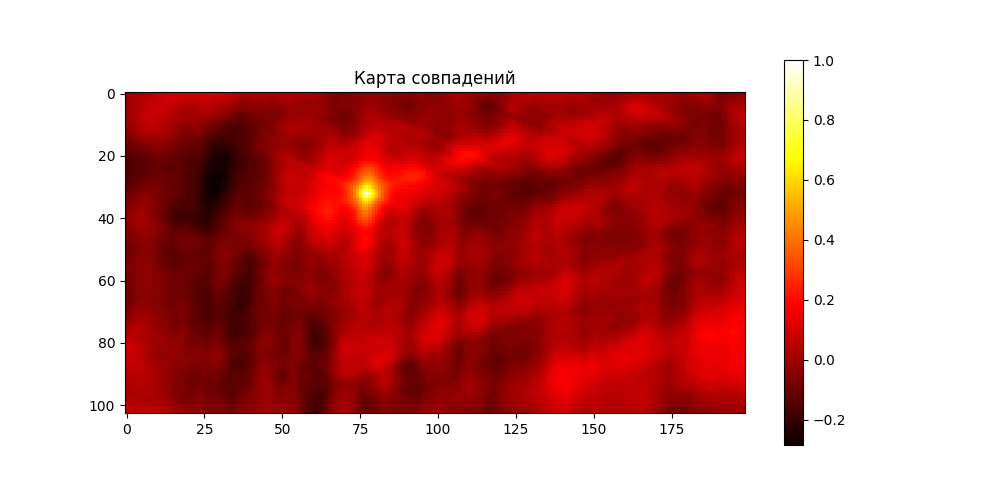

После того как мы получили карту корреляции **result** с помощью функции **cv2.matchTemplate**, нам нужно определить, где на изображении находится наилучшее совпадение с шаблоном. Для этого мы используем функцию **cv2.minMaxLoc**.

In [ ]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

В зависимости от выбранного метода для **cv2.matchTemplate**, наилучшее совпадение будет либо в **min_loc**, либо в **max_loc**.

In [ ]:
start_x, start_y = max_loc

## **Grayscale**

Преобразование обычно осуществляется путем взвешенного суммирования каналов с коэффициентами, отражающими человеческое восприятие яркости разных цветов. Наиболее распространенная формула:

$$
Y = 0.299 \cdot R + 0.587 \cdot G + 0.114 \cdot B
$$

Эти коэффициенты подобраны таким образом, чтобы результат выглядел для человеческого глаза максимально естественно с точки зрения яркостного восприятия.

In [ ]:
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

**Однако**, grayscale-изображение можно представить и в виде трехмерного массива, если вам это нужно для унификации с другими операциями.

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_3ch = np.stack((gray, gray, gray), axis=2) 

# ИЛИ:
gray_3ch = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

При чтении файлов в OpenCV можно сразу указывать необходимый формат:

In [ ]:
cv2.imread('path.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imread('path.jpg', cv2.IMREAD_COLOR)